<a href="https://colab.research.google.com/github/shimyoubin/2025-1-myclass-BDA/blob/main/inclass/05w_B_wnd_0402_easy_ch05_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05주차 수업

In [2]:
import numpy as np
import pandas as pd


In [4]:
df_raw = pd.DataFrame({'var1': [1,2,1],
                       'var2' : [2,3,2],
                       'var3':[10,20,30]})
df_raw

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [7]:
df_new = df_raw.copy()
df_new

,var1,var2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [8]:
id(df_new) == id(df_raw)

False

In [9]:
df_new.rename(columns={'var2':'v2'})

,var1,v2,var3
0,1,2,10
1,2,3,20
2,1,2,30


In [11]:
df_new.rename(index={0:'x', 1:'y', 2:'z'},inplace=True)
df_new

,var1,var2,var3
x,1,2,10
y,2,3,20
z,1,2,30


In [12]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.rename(columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [13]:
df

,A,B
0,1,4
1,2,5
2,3,6


## 파생변수 생성 * 시험!!

In [14]:
df = pd.DataFrame({'var1' : [4, 3, 8],
                   'var2' : [2, 6, 1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [15]:
df1 = df.copy()
df1

,var1,var2
0,4,2
1,3,6
2,8,1


In [16]:
df1['var_sum'] = df1['var1'] + df1['var2']
df1

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [17]:
df1["var_mean"] = (df1["var1"] + df1["var2"]) / 2
df1

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [19]:
df2 = df.copy()
df2

,var1,var2
0,4,2
1,3,6
2,8,1


In [20]:
df2.sum()

,0
var1,15
var2,9


In [21]:
df2.sum(axis=1)

,0
0,6
1,9
2,9


In [22]:
df2['my_sum'] = df2.sum(axis='columns') # axis=1 이랑 같음
df2

,var1,var2,my_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [23]:
df2[["var1","var2"]]

,var1,var2
0,4,2
1,3,6
2,8,1


In [24]:
df2["my_mean"] = df2[["var1","var2"]].mean(axis=1) # 시험 예상
df2

,var1,var2,my_sum,my_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


## MPG연비 변수 생성


In [25]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.31 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [28]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [34]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,24.0,24.0
124,jeep,grand cherokee 4wd,4.0,1999,6,auto(l4),4,15,20,r,suv,17.5,17.5
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,25.0


In [37]:
mpg.cty

,cty
0,18
1,21
2,20
3,21
4,16
...,...
229,19
230,21
231,16
232,18


In [39]:
mpg.total=(mpg.cty + mpg.hwy) /2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [35]:
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2  # 통합 연비 변수 만들기
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [31]:
mpg['mpg_mean'] = mpg[['cty', 'hwy']].mean(axis='columns')  # 통합 연비 변수 만들기
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [32]:
sum(mpg['total']) / len(mpg)  # total 합계를 행 수로 나누기

20.14957264957265

In [33]:
mpg['total'].mean()

np.float64(20.14957264957265)

## 조건문을 활용

In [40]:
mpg['total'].describe()

,total
count,234.000000
mean,20.149573
std,5.050290
min,10.500000
25%,15.500000
50%,20.500000
75%,23.500000
max,39.500000


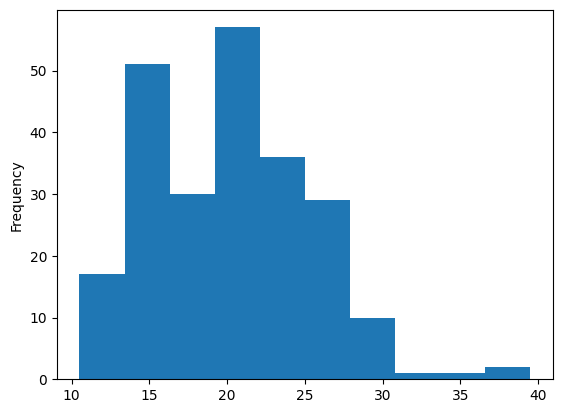

In [41]:
mpg['total'].plot.hist();

In [42]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 64.4 MB/s eta 0:00:00


In [43]:
import koreanize_matplotlib

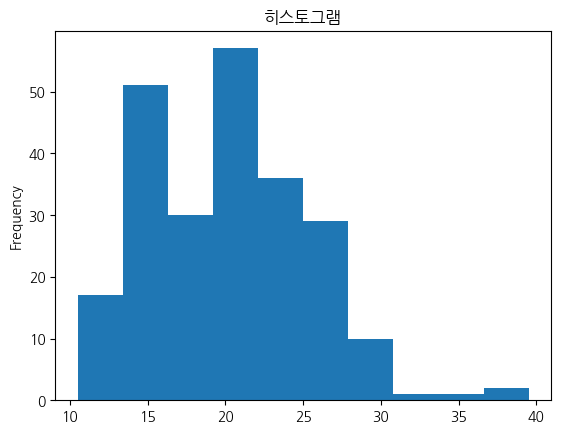

In [44]:
mpg['total'].plot(kind="hist", title="히스토그램");

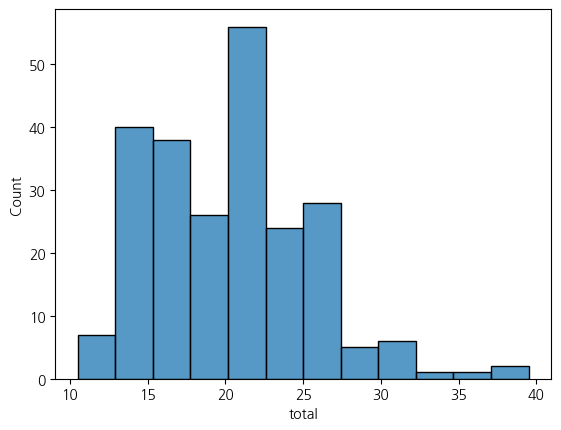

In [45]:
import seaborn as sns

sns.histplot(mpg, x="total"); # x=mpg.total

In [46]:
np.where(30>=5, 'pass', 'fail')

array('pass', dtype='<U4')

In [47]:
mpg['test'] = np.where(mpg.total >=20, 'pass', 'fail')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test
188,toyota,camry solara,2.4,2008,4,manual(m5),f,21,31,r,compact,26.0,26.0,pass
40,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan,19.0,19.0,fail
115,hyundai,tiburon,2.0,1999,4,auto(l4),f,19,26,r,subcompact,22.5,22.5,pass
57,dodge,durango 4wd,3.9,1999,6,auto(l4),4,13,17,r,suv,15.0,15.0,fail
186,toyota,camry solara,2.2,1999,4,auto(l4),f,21,27,r,compact,24.0,24.0,pass


In [48]:
mpg.test.value_counts()

,count
test,
pass,128
fail,106


In [49]:
type(mpg.test.value_counts())

pandas.core.series.Series

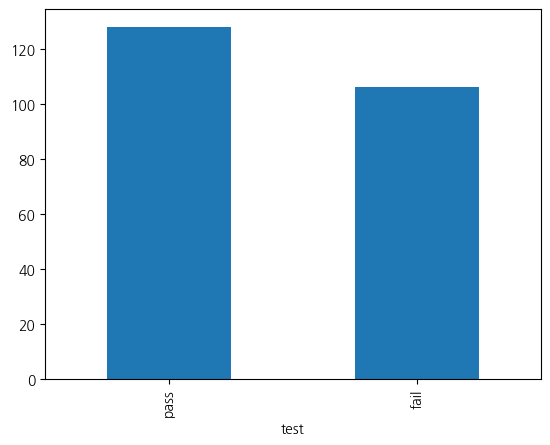

In [50]:
mpg.test.value_counts().plot.bar();

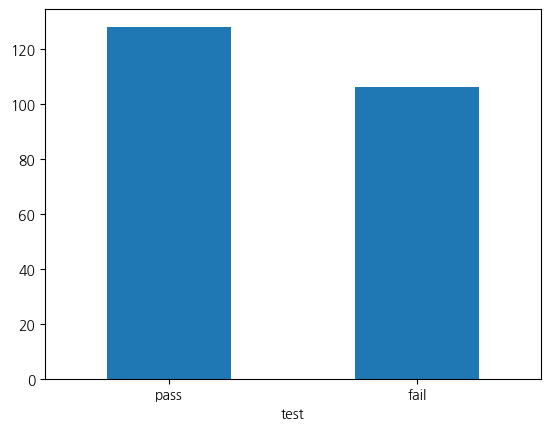

In [52]:
mpg.test.value_counts().plot.bar(rot=0);

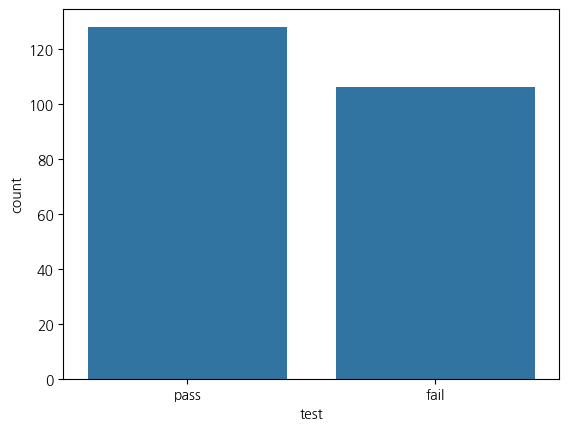

In [53]:
sns.countplot(mpg, x="test");

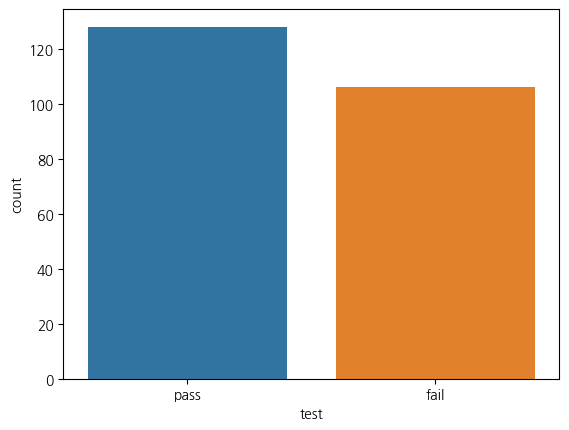

In [54]:
sns.countplot(mpg, x="test", hue='test');

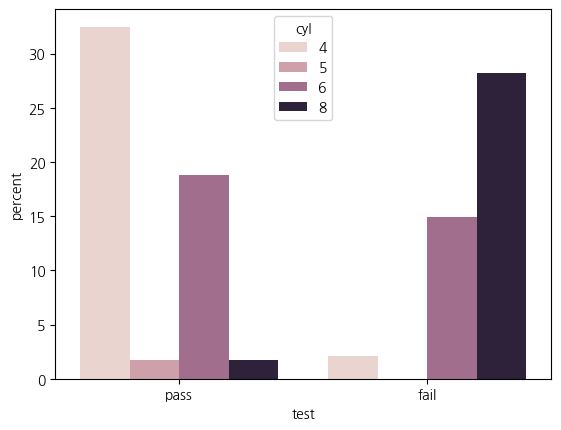

In [55]:
sns.countplot(mpg, x="test", hue='cyl', stat='percent');

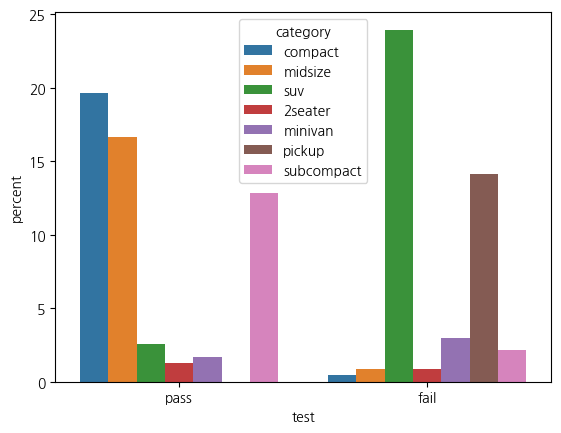

In [56]:
sns.countplot(mpg, x="test", hue='category', stat='percent');

In [58]:
np.where(mpg.total >= 30, 'A',
         np.where(mpg.total>=20,'B','C'))

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'B',
       'B', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'C', 'C', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B',
       'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'A', 'B', 'B', 'B', 'B',
       'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B

In [59]:
mpg['grade'] =np.where(mpg.total >= 30, 'A',
              np.where(mpg.total>=20,'B','C'))
mpg.sample(5  )

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
156,pontiac,grand prix,3.8,1999,6,auto(l4),f,17,27,r,midsize,22.0,22.0,pass,B
116,hyundai,tiburon,2.0,1999,4,manual(m5),f,19,29,r,subcompact,24.0,24.0,pass,B
89,ford,f150 pickup 4wd,5.4,2008,8,auto(l4),4,13,17,r,pickup,15.0,15.0,fail,C
173,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv,17.5,17.5,fail,C
135,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,16,p,suv,13.5,13.5,fail,C


In [62]:
n_grade = mpg.grade.value_counts()
n_grade

,count
grade,
B,118
C,106
A,10


<Axes: xlabel='grade'>

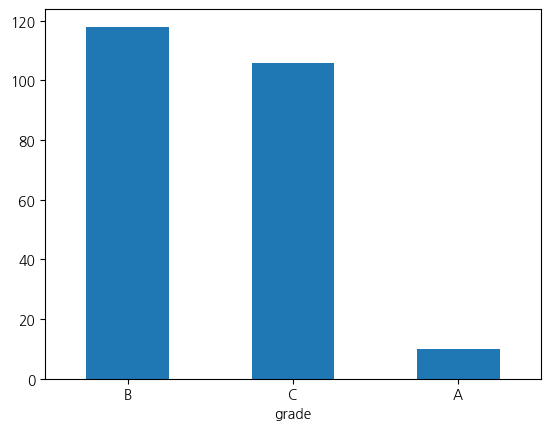

In [63]:
n_grade.plot.bar(rot=0)

In [65]:
n_grade = mpg.grade.value_counts().sort_index()
n_grade

,count
grade,
A,10
B,118
C,106


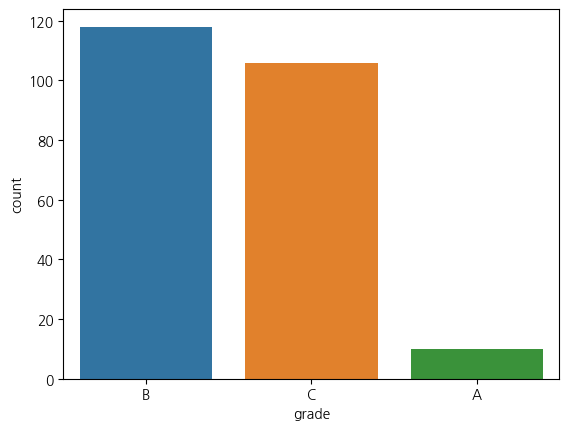

In [66]:
sns.countplot(mpg, x="grade", hue="grade");

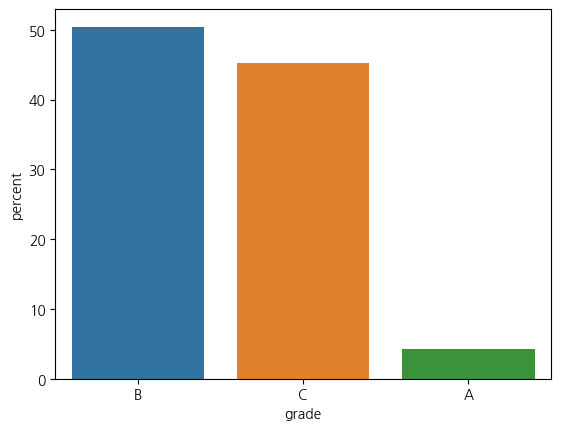

In [67]:
sns.countplot(mpg, x="grade", hue="grade", stat='percent');

In [72]:
mpg.grade.value_counts().index

Index(['B', 'C', 'A'], dtype='object', name='grade')

In [71]:
mpg.grade.value_counts().sort_index().index

Index(['A', 'B', 'C'], dtype='object', name='grade')

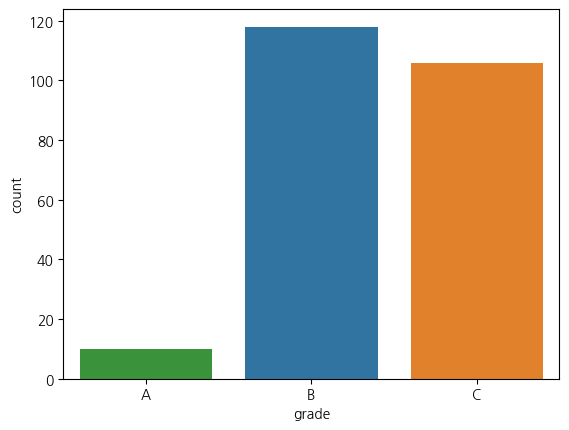

In [73]:
sns.countplot(mpg, x="grade", hue="grade", order=mpg.grade.value_counts().sort_index().index);

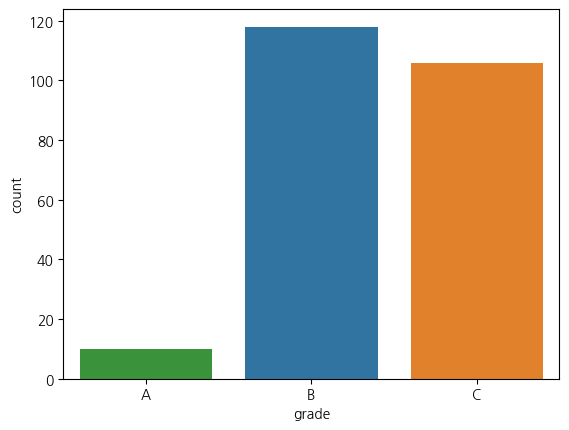

In [75]:
sns.countplot(mpg, x="grade", hue="grade", order=['A','B','C']);

In [76]:
mpg['grade'].unique()

array(['B', 'C', 'A'], dtype=object)

In [77]:
np.sort(mpg['grade'].unique())

array(['A', 'B', 'C'], dtype=object)

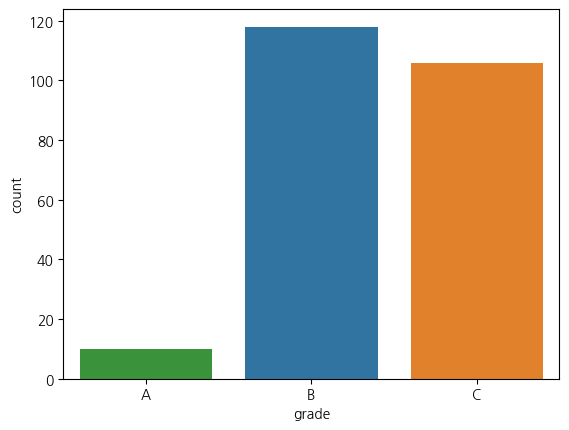

In [78]:
sns.countplot(mpg, x="grade", hue="grade", order=np.sort(mpg['grade'].unique()));

## 매소드 체이닝

In [79]:
s = mpg['grade']
s = s.value_counts()
s = s.sort_index()
type(s)

pandas.core.series.Series

In [80]:
s

,count
grade,
A,10
B,118
C,106


In [81]:
s = mpg['grade'].value_counts().sort_index()
s

,count
grade,
A,10
B,118
C,106


In [82]:
mpg['grade'].value_counts().sort_values()

,count
grade,
A,10
C,106
B,118


In [83]:
mpg['grade'].value_counts().sort_values(ascending=False)

,count
grade,
B,118
C,106
A,10


In [84]:
mpg['grade'] =np.where(mpg.total >= 30, 'A',
              np.where(mpg.total >= 25, 'B',
              np.where(mpg.total >= 20, 'C', 'D')))
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mpg_mean,test,grade
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5,39.5,pass,A
35,chevrolet,malibu,3.5,2008,6,auto(l4),f,18,29,r,midsize,23.5,23.5,pass,C
224,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact,22.5,22.5,pass,C
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact,25.0,25.0,pass,B
109,hyundai,sonata,2.4,1999,4,manual(m5),f,18,27,r,midsize,22.5,22.5,pass,C


## 연산자 |(or) 매소드 isin

In [85]:
mpg['size'] = np.where((mpg['category'] == 'compact') |
                       (mpg['category'] == 'subcompact') |
                       (mpg['category'] == '2seater'), 'small', 'large')

mpg['size'].value_counts()

,count
size,
large,147
small,87


In [86]:
mpg['size'] = np.where(mpg['category'].isin(['compact', 'subcompact', '2seater']), 'small', 'large') # 시험 문제

mpg['size'].value_counts() # isin을 바꾸면 이거?

,count
size,
large,147
small,87


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


<Axes: xlabel='test'>

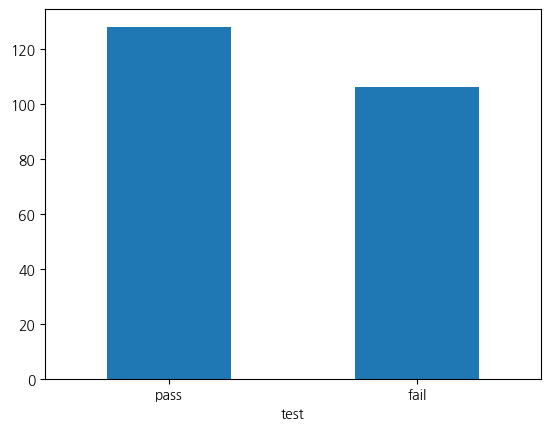

In [87]:
# 1. 패키지 로드
import pandas as pd
import numpy as np

# 2. 데이터 불러오기
mpg = pd.read_csv('data/mpg.csv')

# 3. 데이터 파악하기
mpg.shape       # 행, 열 수
mpg.head()      # 데이터 앞부분
mpg.tail()      # 데이터 뒷부분
mpg.info()      # 속성
mpg.describe()  # 요약 통계량

# 4. 변수명 바꾸기
mpg = mpg.rename(columns = {'manufacturer' : 'company'})

# 5. 파생변수 만들기
mpg['total'] = (mpg['cty'] + mpg['hwy'])/2                  # 변수 조합
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')  # 조건문 활용

# 6. 빈도 확인하기
count_test = mpg['test'].value_counts()  # 빈도표 만들기
count_test.plot.bar(rot = 0)             # 빈도 막대 그래프 만들기

## 단원 06

In [91]:
!git clone https://github.com/ai7dnn/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [96]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(6)

,id,nclass,math,english,science
4,5,2,25,80,65
2,3,1,45,86,78
10,11,3,65,65,65
7,8,2,90,78,25
11,12,3,45,85,32
14,15,4,75,56,78


In [97]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [100]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [101]:
exam.query('nclass != 1')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


In [102]:
exam[exam['nclass'] == 2]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [103]:
exam[exam.nclass == 2]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [104]:
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [105]:
exam.query('english >= 80')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
8,9,3,20,98,15
9,10,3,50,98,45
11,12,3,45,85,32


In [106]:
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [107]:
exam[(exam.nclass == 1) & (exam.math >= 50)] # 괄호를 반드시 사용

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [108]:
exam.query('english < 90 | science < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


In [109]:
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [110]:
3 in [1, 2, 3, 4]

True

In [111]:
exam.query('nclass in [1, 3, 5]') # 시험 예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [112]:
exam[exam.nclass.isin([1, 3, 5])] # 시험 예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [113]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam.query('nclass == 1')

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam.query('nclass == 2')

In [114]:
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [115]:
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [116]:
nclass1["math"].mean()

np.float64(46.25)

In [117]:
nclass2.english.mean()

np.float64(84.25)

In [118]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam[exam.nclass == 1]

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam[exam.nclass == 2]

In [119]:
nclass2.math.mean()

np.float64(61.25)

In [120]:
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [121]:
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [122]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [123]:
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


In [124]:
df.query("sex == 'F' & country == 'Korea'")

,sex,country
0,F,Korea


In [125]:
df.query("sex == 'M' & country == 'China'")

,sex,country
1,M,China


In [126]:
var = 3
exam.query('nclass == @var')

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


### (알아 두면 좋아요) 파이썬에서 사용하는 기호

| 논리 연산자 | 기능        |
|:-----------:|-------------|
| <           | 작다        |
| <=          | 작거나 같다 |
| >           | 크다        |
| >=          | 크거나 같다 |
| ==          | 같다        |
| !=          | 같지 않다   |
| \|          | 또는        |
| &           | 그리고      |
| in          | 매칭 확인   |

| 산술 연산자 | 기능            |
|:-----------:|-----------------|
| +           | 더하기          |
| -           | 빼기            |
| *           | 곱하기          |
| **          | 제곱            |
| /           | 나누기          |
| //          | 나눗셈의 몫     |
| %           | 나눗셈의 나머지 |

### df.isin()

In [127]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [128]:
df.isin([0, 4]) # list나 dict 형태

,num_legs,num_wings
falcon,False,False
dog,True,True


In [129]:
~df.isin([0, 4])

,num_legs,num_wings
falcon,True,True
dog,False,False


In [130]:
exam["math"]

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


In [131]:
exam.math

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


In [132]:
exam[["math", "english"]]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98
4,25,80
5,50,89
6,80,90
7,90,78
8,20,98
9,50,98


In [133]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [134]:
exam.columns[3]

'english'

In [135]:
exam[exam.columns[3]]

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [136]:
exam.columns[1:3]

Index(['nclass', 'math'], dtype='object')

In [137]:
exam[exam.columns[1:3]]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


## drop()

In [138]:
exam.drop(columns="math")

,id,nclass,english,science
0,1,1,98,50
1,2,1,97,60
2,3,1,86,78
3,4,1,98,58
4,5,2,80,65
5,6,2,89,98
6,7,2,90,45
7,8,2,78,25
8,9,3,98,15
9,10,3,98,45


In [139]:
exam.head(3)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78


In [140]:
exam.drop(columns=["math", 'english'])

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [141]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [142]:
exam.drop(2)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [143]:
exam.drop([2, 4, 6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [144]:
exam.drop(index=[2, 4, 6])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [145]:
exam.drop(labels=[2, 4, 6], axis=0)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
5,6,2,50,89,98
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65


In [146]:
exam.drop(labels=["math", "english"], axis=1)

,id,nclass,science
0,1,1,50
1,2,1,60
2,3,1,78
3,4,1,58
4,5,2,65
5,6,2,98
6,7,2,45
7,8,2,25
8,9,3,15
9,10,3,45


In [147]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [148]:
exam.query('nclass == 1')['math']

,math
0,50
1,60
2,45
3,30


In [149]:
exam.query('nclass == 1')[['math', 'english']]

,math,english
0,50,98
1,60,97
2,45,86
3,30,98


In [150]:
exam.query('math >= 50')[['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [151]:
exam[exam.math >= 50][['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [153]:
exam[exam.math >= 50][['id', 'math']].head()

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


In [154]:
exam.query('math >= 50') \
    [['id', 'math']] \
    .head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [155]:
exam.query('math >= 50')[['id', 'math']].head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


## 정렬

In [156]:
exam.sort_values('math', ascending=False).head(4)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
6,7,2,80,90,45
17,18,5,80,78,90


In [160]:
exam.sort_values(['nclass', 'math']).head(7)

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


In [161]:
exam.sort_values(['nclass', 'math'], ascending=[True, False]).head(7)

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98


In [162]:
exam.sort_index(ascending=False).head()

,id,nclass,math,english,science
19,20,5,78,83,58
18,19,5,89,68,87
17,18,5,80,78,90
16,17,5,65,68,98
15,16,4,58,98,65


# 종료
